project object : we train multiple machine learning model to predict heart attack

Methodology : 
1.visualise and explore the dataset download from kaggle
2.preprocess the dataset, filling null values if have, detect and remove outlier
3.train a randomforest model to detect the important feature of attributes and select best attributes
4 . save the final dataset
5.train 6 models using that final dataset
6.compare all models and find the best one and deploy it

In [1]:
#importing required libaries 
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading or load our downloaded dataset
df=pd.read_csv("/content/heart_copy.csv")

Explore and visualise the data

In [3]:
#copy the dataset into X variable for next steps
X=df.copy()
#explore  the dataset
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,caa,thall,output
0,63.0,M,asymptomatic,145.0,233,High,normal,150,NO,2.3,0,B,High
1,37.0,M,non-anginal pain,130.0,250,Normal,ST-T wave abnormality,187,NO,3.5,0,C,High
2,41.0,F,atypical angina,1200.0,204,Normal,normal,172,NO,1.4,0,C,High
3,56.0,M,atypical angina,120.0,236,Normal,ST-T wave abnormality,178,NO,0.8,0,C,High
4,57.0,F,typical angina,120.0,354,Normal,ST-T wave abnormality,163,Yes,0.6,0,C,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,F,typical angina,140.0,241,Normal,ST-T wave abnormality,123,Yes,0.2,0,D,Normal
299,45.0,M,asymptomatic,110.0,264,Normal,ST-T wave abnormality,132,NO,1.2,0,D,Normal
300,68.0,M,typical angina,144.0,193,High,ST-T wave abnormality,141,NO,3.4,2,D,Normal
301,57.0,M,typical angina,130.0,131,Normal,ST-T wave abnormality,115,Yes,1.2,1,D,Normal


In [4]:
#explore all stats
X.describe(include="all")

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,caa,thall,output
count,302.000000,303,303,301.000000,303.000000,303,303,303.000000,303,303.000000,303.000000,303,303
unique,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,NaN,4,2
top,NaN,M,typical angina,NaN,NaN,Normal,ST-T wave abnormality,NaN,NO,NaN,NaN,C,High
freq,NaN,207,143,NaN,NaN,258,152,NaN,204,NaN,NaN,166,165
mean,54.374172,NaN,NaN,135.156146,246.264026,NaN,NaN,149.646865,NaN,1.039604,0.729373,NaN,NaN
std,9.096149,NaN,NaN,64.043934,51.830751,NaN,NaN,22.905161,NaN,1.161075,1.022606,NaN,NaN
min,29.000000,NaN,NaN,94.000000,126.000000,NaN,NaN,71.000000,NaN,0.000000,0.000000,NaN,NaN
25%,47.250000,NaN,NaN,120.000000,211.000000,NaN,NaN,133.500000,NaN,0.000000,0.000000,NaN,NaN
50%,55.500000,NaN,NaN,130.000000,240.000000,NaN,NaN,153.000000,NaN,0.800000,0.000000,NaN,NaN
75%,61.000000,NaN,NaN,140.000000,274.500000,NaN,NaN,166.000000,NaN,1.600000,1.000000,NaN,NaN


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trtbps    301 non-null    float64
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  caa       303 non-null    int64  
 11  thall     303 non-null    object 
 12  output    303 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 30.9+ KB


In [6]:
X.isnull().sum()

age         1
sex         0
cp          0
trtbps      2
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
caa         0
thall       0
output      0
dtype: int64

In [7]:
#print all attribute as a list format
print(X.columns.tolist())

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'caa', 'thall', 'output']


In [8]:
#replace all categorical variables in numerical values for mathemetical operations
X['sex'].replace(['M', 'F'],[0, 1], inplace=True)
X['cp'].replace(['typical angina', 'atypical angina','non-anginal pain','asymptomatic'],[1,2,3,4], inplace=True)

In [9]:
X['fbs'].replace(['Normal', 'High'],[0, 1], inplace=True)
X['restecg'].replace(['normal', 'ST-T wave abnormality','left ventricular hypertrophy'],[0, 1,2], inplace=True)
X['exng'].replace(['NO', 'Yes'],[0, 1], inplace=True)



In [10]:
X['thall'].replace(['A','B','C','D'],[0,1,2,3], inplace=True)

In [11]:
X['output'].replace(['Normal','High'],[0,1], inplace=True)

In [12]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,caa,thall,output
0,63.0,0,4,145.0,233,1,0,150,0,2.3,0,1,1
1,37.0,0,3,130.0,250,0,1,187,0,3.5,0,2,1
2,41.0,1,2,1200.0,204,0,0,172,0,1.4,0,2,1
3,56.0,0,2,120.0,236,0,1,178,0,0.8,0,2,1
4,57.0,1,1,120.0,354,0,1,163,1,0.6,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,1,1,140.0,241,0,1,123,1,0.2,0,3,0
299,45.0,0,4,110.0,264,0,1,132,0,1.2,0,3,0
300,68.0,0,1,144.0,193,1,1,141,0,3.4,2,3,0
301,57.0,0,1,130.0,131,0,1,115,1,1.2,1,3,0


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    301 non-null    float64
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  caa       303 non-null    int64  
 11  thall     303 non-null    int64  
 12  output    303 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [14]:
print(X.isnull().sum())

age         1
sex         0
cp          0
trtbps      2
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
caa         0
thall       0
output      0
dtype: int64


<Axes: >

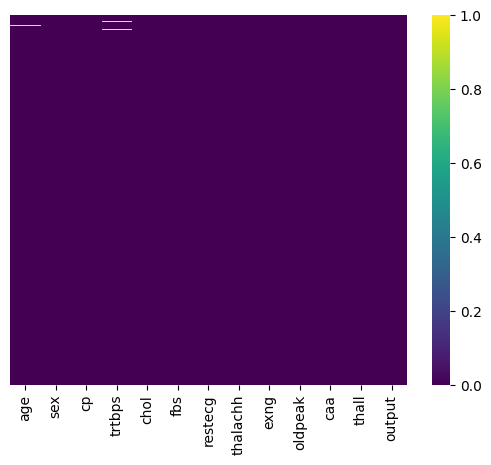

In [15]:
#visualise all null values using seaborn heatmap
sns.heatmap(X.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')

In [16]:
#replace null values with that attribute's mean
X['age'].fillna(X['age'].mean(), inplace = True)
X['trtbps'].fillna(X['trtbps'].mean(), inplace = True)

In [17]:
print(X.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
caa         0
thall       0
output      0
dtype: int64


<Axes: >

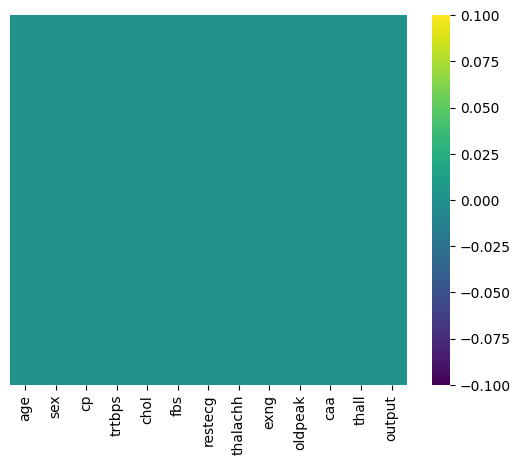

In [18]:
#create heat map after filling null values
sns.heatmap(X.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')

In [19]:
#save a copy of X,if further required
X_copy=X.copy()
X_copy

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,caa,thall,output
0,63.0,0,4,145.0,233,1,0,150,0,2.3,0,1,1
1,37.0,0,3,130.0,250,0,1,187,0,3.5,0,2,1
2,41.0,1,2,1200.0,204,0,0,172,0,1.4,0,2,1
3,56.0,0,2,120.0,236,0,1,178,0,0.8,0,2,1
4,57.0,1,1,120.0,354,0,1,163,1,0.6,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,1,1,140.0,241,0,1,123,1,0.2,0,3,0
299,45.0,0,4,110.0,264,0,1,132,0,1.2,0,3,0
300,68.0,0,1,144.0,193,1,1,141,0,3.4,2,3,0
301,57.0,0,1,130.0,131,0,1,115,1,1.2,1,3,0


In [20]:
#the correlation of each attribute with output 
n=X.columns[:-1]
for i in n:
  corr=X[i].corr(X['output'])
  print(i,":",corr)

age : -0.22467374074635557
sex : 0.28093657550176654
cp : 0.4337982615068934
trtbps : 0.010872204539581229
chol : -0.08523910513756904
fbs : -0.028045760272712827
restecg : 0.13722950287377336
thalachh : 0.42174093381067435
exng : -0.4367570833533018
oldpeak : -0.4306960016873684
caa : -0.3917239923512519
thall : -0.3440292680383098


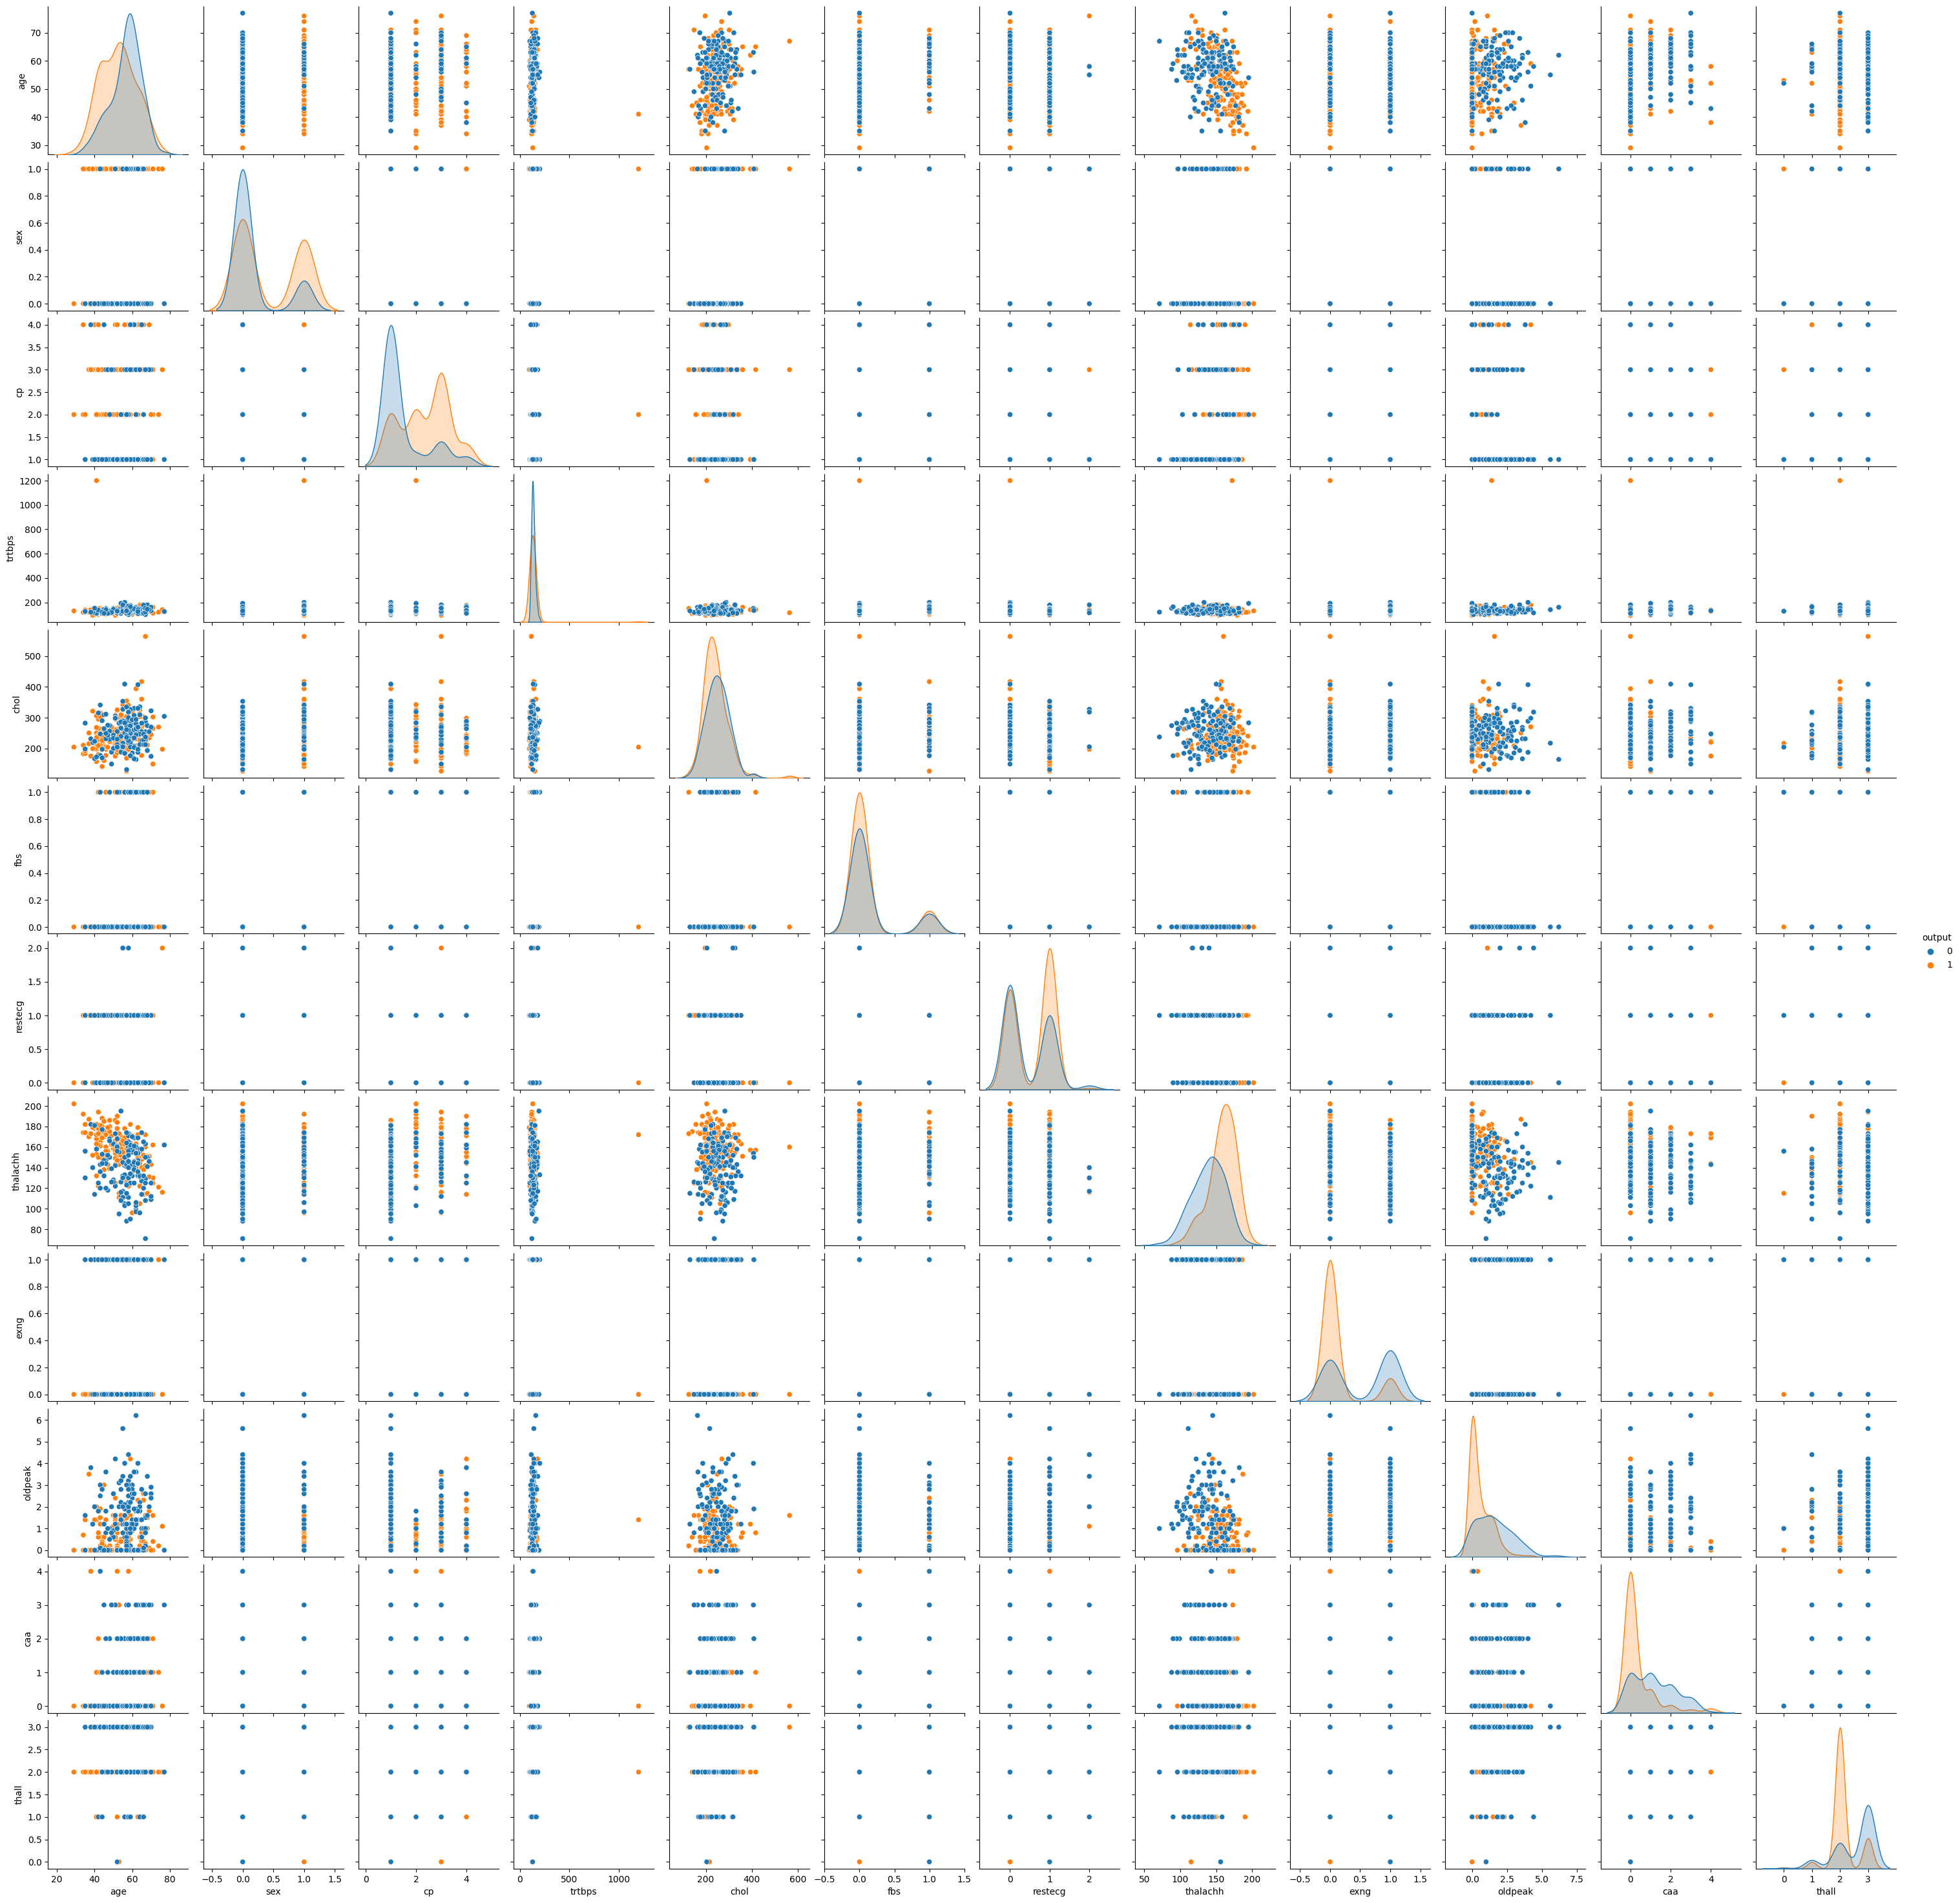

In [21]:
sns.pairplot(X_copy,hue= "output")

In [22]:
X_copy=X.copy()

Now we visualise every attribute distribution by using distribution and box ploting, and thereafter find outlier if exists

Text(0.5, 1.0, 'Before')

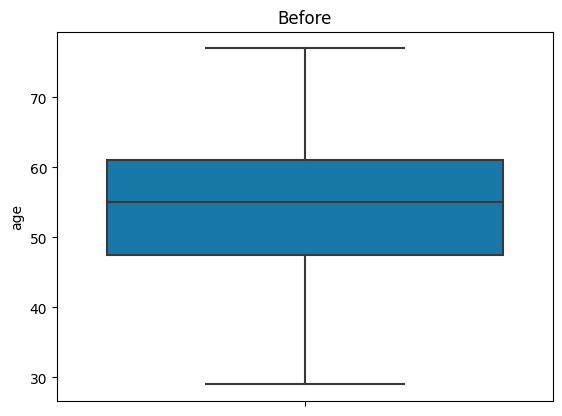

In [23]:
sns.boxplot(y="age",data=X_copy,palette="winter")


plt.title('Before')

Text(0.5, 1.0, 'Before')

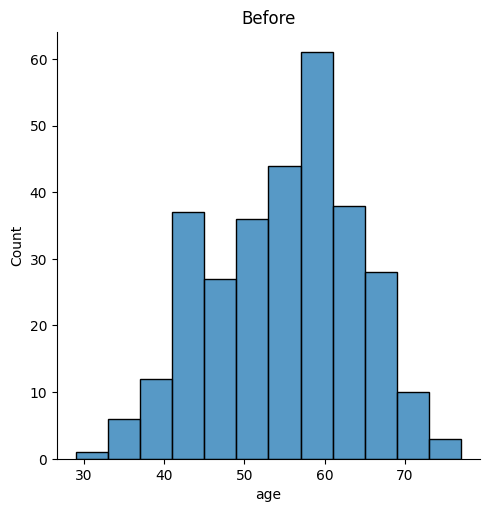

In [24]:
sns.displot(X_copy["age"])
plt.title('Before')

Text(0.5, 1.0, 'Before')

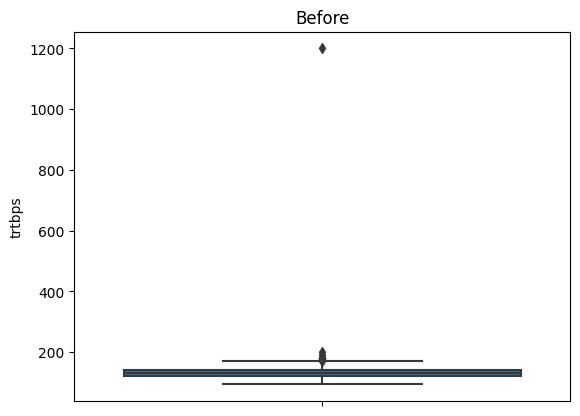

In [25]:
sns.boxplot(y="trtbps",data=X_copy,palette="winter")
plt.title('Before')

Text(0.5, 1.0, 'Before')

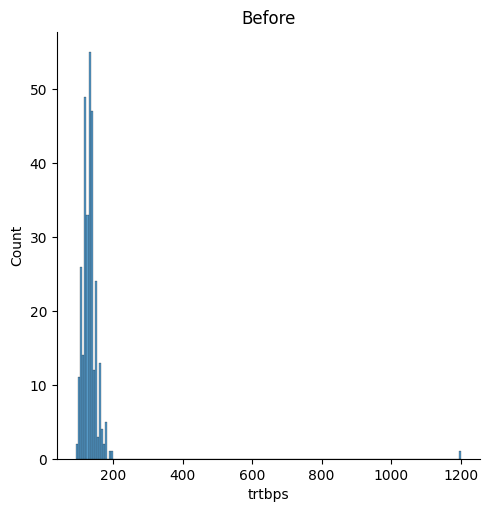

In [26]:
sns.displot(X_copy["trtbps"])
plt.title('Before')

Text(0.5, 1.0, 'Before')

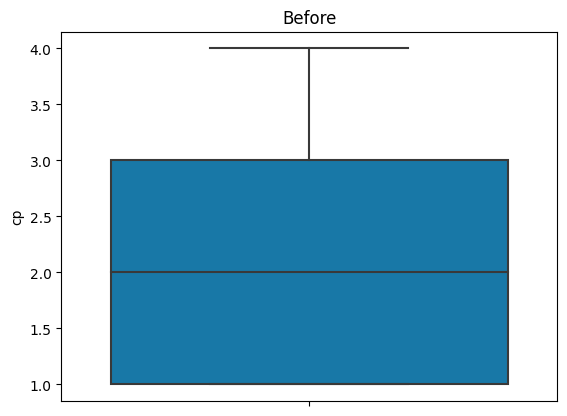

In [27]:
sns.boxplot(y="cp",data=X_copy,palette="winter")
plt.title('Before')

Text(0.5, 1.0, 'Before')

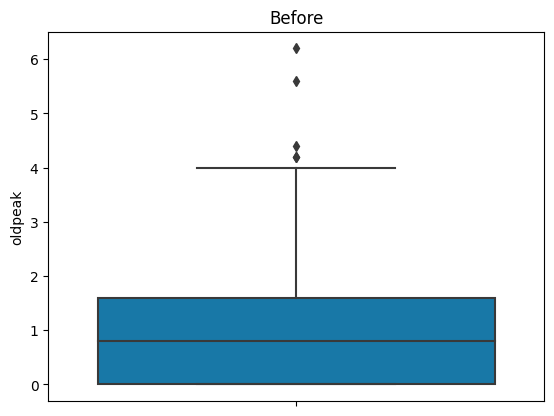

In [28]:
sns.boxplot(y="oldpeak",data=X_copy,palette="winter")
plt.title('Before')

Text(0.5, 1.0, 'Before')

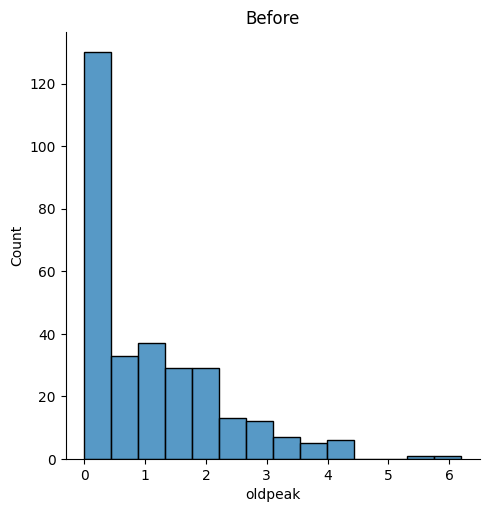

In [29]:
sns.displot(X_copy["oldpeak"])
plt.title('Before')

Text(0.5, 1.0, 'Before')

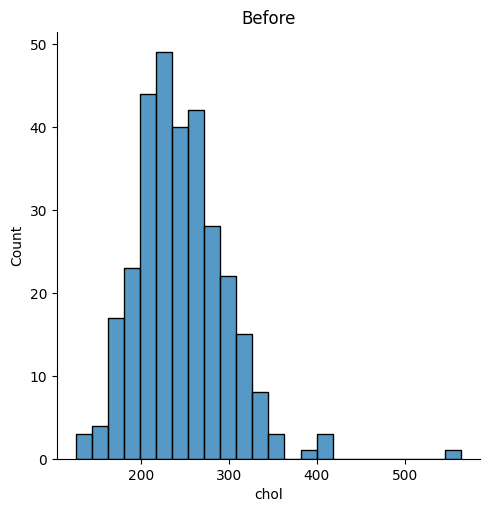

In [30]:
sns.displot(X_copy["chol"])
plt.title('Before')

Text(0.5, 1.0, 'Before')

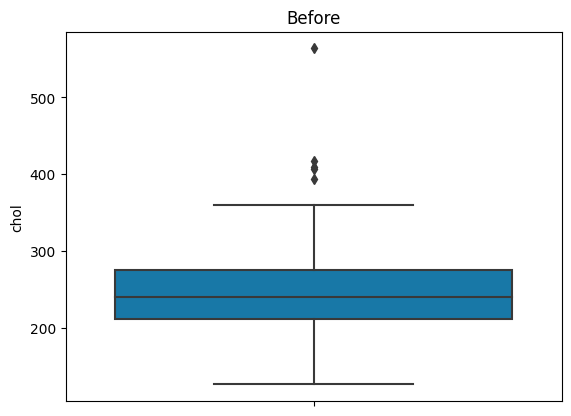

In [31]:
sns.boxplot(y="chol",data=X_copy,palette="winter")
plt.title('Before')

Text(0.5, 1.0, 'Before')

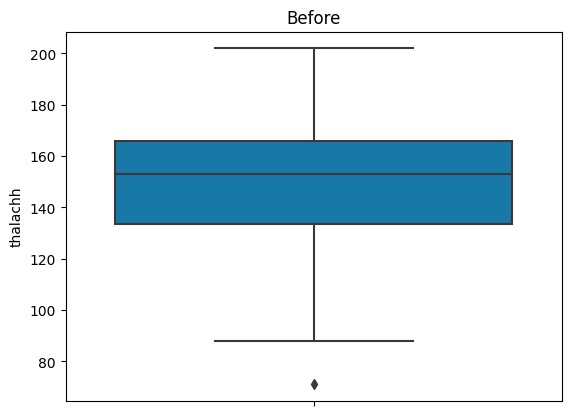

In [32]:
sns.boxplot(y="thalachh",data=X_copy,palette="winter")
plt.title('Before')

Text(0.5, 1.0, 'Before')

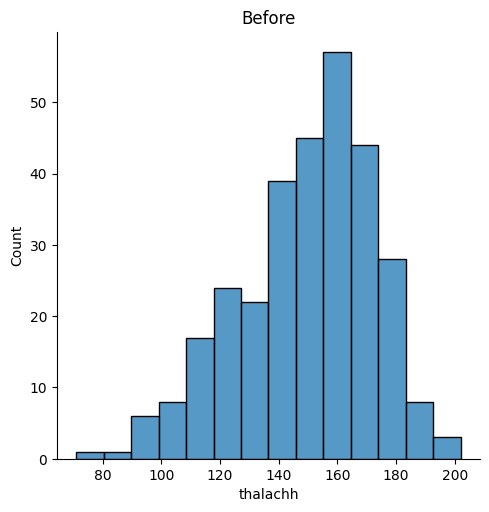

In [33]:
sns.displot(X_copy["thalachh"])
plt.title('Before')

Text(0.5, 1.0, 'Before')

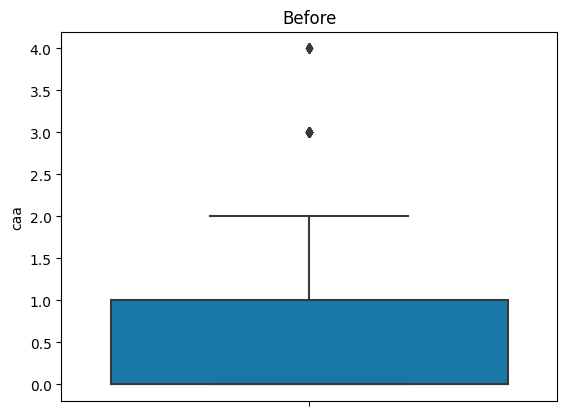

In [34]:
sns.boxplot(y="caa",data=X_copy,palette="winter")
plt.title('Before')


Text(0.5, 1.0, 'Before')

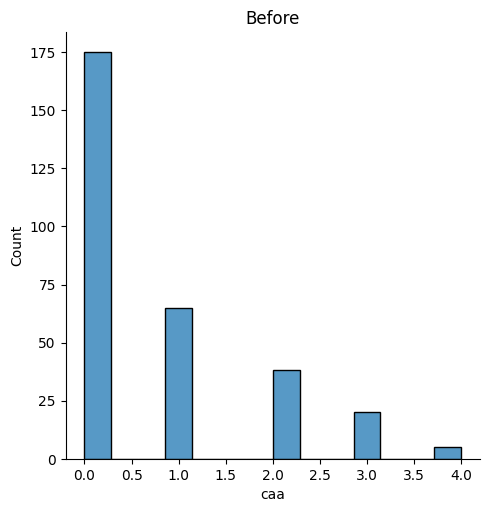

In [35]:
sns.displot(X_copy["caa"])
plt.title('Before')

As we notice above plots that some data points are acting as outlier either extreme high or extreme low value, so we remove it by finding Z score of each datapoint of each attribute

In [36]:
from scipy import stats
z = np.abs(stats.zscore(X))
z

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,caa,thall,output
0,0.951440,0.681005,1.973123,0.154471,0.256334,2.394438,1.005832,0.015443,0.696631,1.087338,0.714429,2.148873,0.914529
1,1.916393,0.681005,1.002577,0.080911,0.072199,0.417635,0.898962,1.633471,0.696631,2.122573,0.714429,0.512922,0.914529
2,1.475188,1.468418,0.032031,16.709698,0.816773,0.417635,1.005832,0.977514,0.696631,0.310912,0.714429,0.512922,0.914529
3,0.179331,0.681005,0.032031,0.237833,0.198357,0.417635,0.898962,1.239897,0.696631,0.206705,0.714429,0.512922,0.914529
4,0.289632,1.468418,0.938515,0.237833,2.082050,0.417635,0.898962,0.583939,1.435481,0.379244,0.714429,0.512922,0.914529
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.289632,1.468418,0.938515,0.076011,0.101730,0.417635,0.898962,1.165281,1.435481,0.724323,0.714429,1.123029,1.093459
299,1.033983,0.681005,1.973123,0.394754,0.342756,0.417635,0.898962,0.771706,0.696631,0.138373,0.714429,1.123029,1.093459
300,1.502946,0.681005,0.938515,0.138779,1.029353,2.394438,0.898962,0.378132,0.696631,2.036303,1.244593,1.123029,1.093459
301,0.289632,0.681005,0.938515,0.080911,2.227533,0.417635,0.898962,1.515125,1.435481,0.138373,0.265082,1.123029,1.093459


we set thareshold value of Z =3

In [37]:
print(np.where(z > 3))

(array([  2,  28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 246, 251,
       272, 281]), array([ 3,  4, 11,  4, 10, 10, 10, 10,  9,  4,  9,  4, 10,  7, 11]))


In [38]:
#now drop the rows which have outlier
X.drop([  2,  28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 246, 251,
       272, 281],axis=0,inplace=True)

In [39]:
X
#after removing outlier only 288 rows remain in dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,caa,thall,output
0,63.0,0,4,145.000000,233,1,0,150,0,2.3,0,1,1
1,37.0,0,3,130.000000,250,0,1,187,0,3.5,0,2,1
3,56.0,0,2,120.000000,236,0,1,178,0,0.8,0,2,1
4,57.0,1,1,120.000000,354,0,1,163,1,0.6,0,2,1
5,57.0,0,1,135.156146,192,0,1,148,0,0.4,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,1,1,140.000000,241,0,1,123,1,0.2,0,3,0
299,45.0,0,4,110.000000,264,0,1,132,0,1.2,0,3,0
300,68.0,0,1,144.000000,193,1,1,141,0,3.4,2,3,0
301,57.0,0,1,130.000000,131,0,1,115,1,1.2,1,3,0


now visualise the attributes which have outliers

Text(0.5, 1.0, 'After')

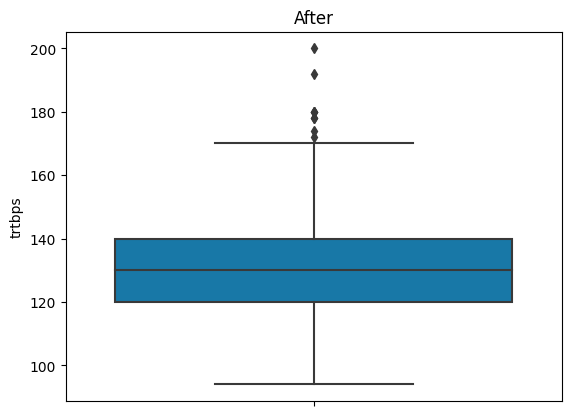

In [40]:
sns.boxplot(y="trtbps",data=X,palette="winter")
plt.title("After")

Text(0.5, 1.0, 'After')

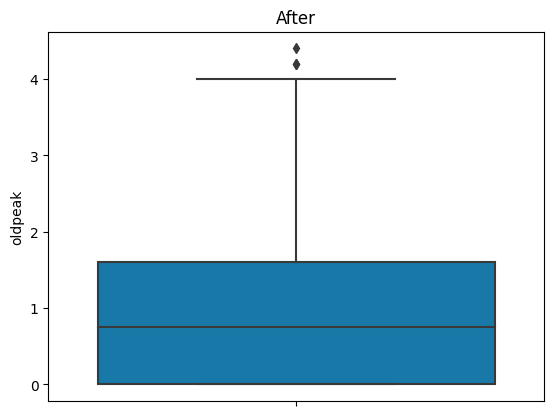

In [41]:
sns.boxplot(y="oldpeak",data=X,palette="winter")
plt.title("After")

Text(0.5, 1.0, 'After')

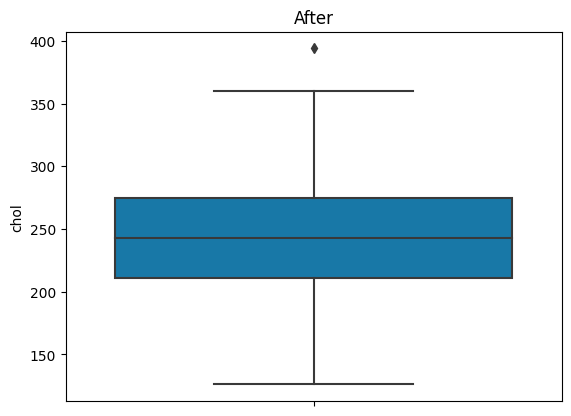

In [42]:
sns.boxplot(y="chol",data=X,palette="winter")
plt.title("After")

Text(0.5, 1.0, 'After')

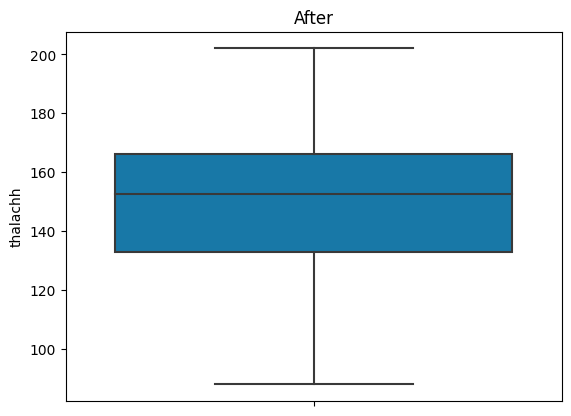

In [43]:
sns.boxplot(y="thalachh",data=X,palette="winter")
plt.title("After")

Text(0.5, 1.0, 'After')

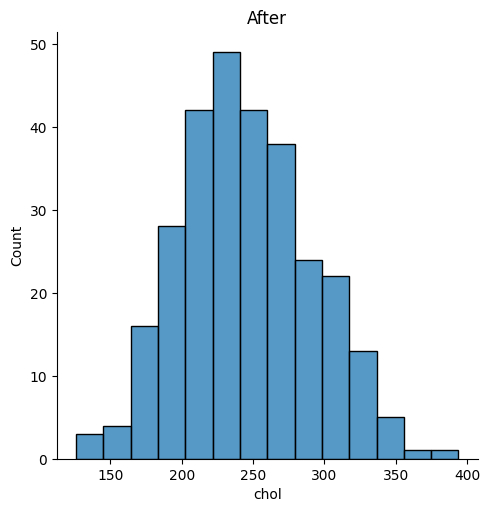

In [44]:
sns.displot(X["chol"])
plt.title('After')

Text(0.5, 1.0, 'After')

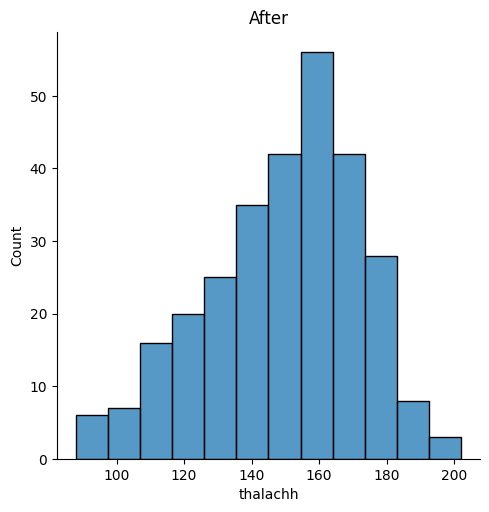

In [45]:
sns.displot(X["thalachh"])
plt.title('After')

Text(0.5, 1.0, 'After')

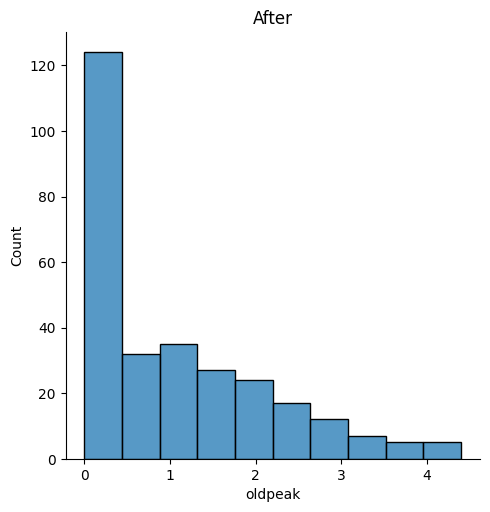

In [46]:
sns.displot(X["oldpeak"])
plt.title('After')

Text(0.5, 1.0, 'After')

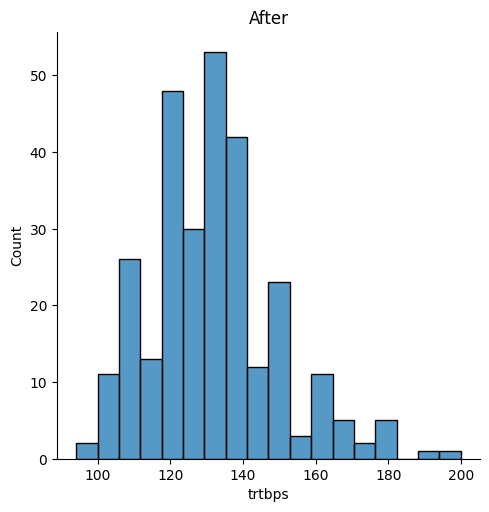

In [47]:
sns.displot(X["trtbps"])
plt.title('After')

<Axes: xlabel='sex', ylabel='age'>

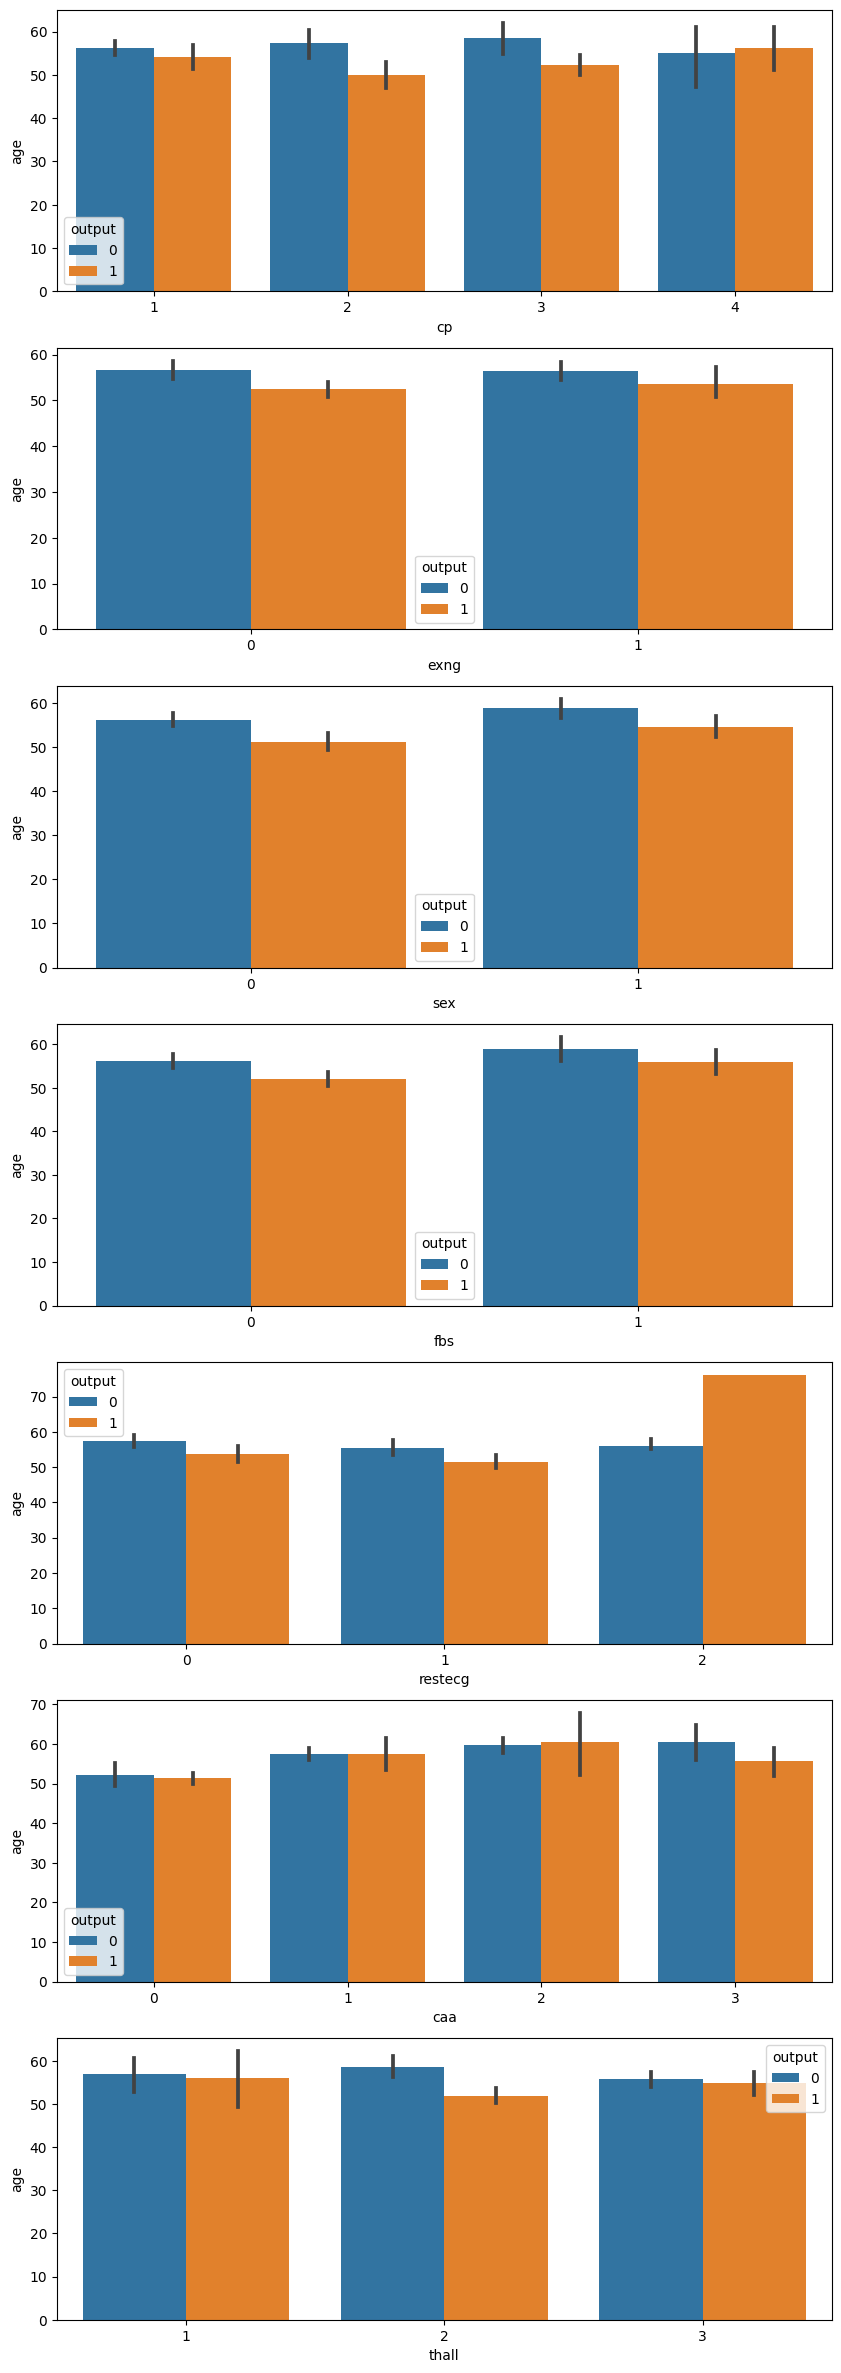

In [48]:
#now we visualise 7 attributes in box plot againts age ,hue output
l,axes=plt.subplots(7,1,figsize=(10,30))
sns.barplot(x=X.cp,y=X.age,hue=X.output,ax=axes[0])
sns.barplot(x=X.exng,y=X.age,hue=X.output,ax=axes[1])

sns.barplot(x=X.fbs,y=X.age,hue=X.output,ax=axes[3])
sns.barplot(x=X.restecg,y=X.age,hue=X.output,ax=axes[4])
sns.barplot(x=X.caa,y=X.age,hue=X.output,ax=axes[5])
sns.barplot(x=X.thall,y=X.age,hue=X.output,ax=axes[6])
sns.barplot(x=X.sex,y=X.age,hue=X.output,ax=axes[2])

Now we train a random forest classifier with this dataset to find best features for further process

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,auc,mean_squared_error,accuracy_score

In [50]:
x_train,x_test,y_train,y_test=train_test_split(X.drop('output',axis=1),X['output'],test_size=0.30,random_state=100)

In [51]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(201, 12)
(87, 12)
(201,)
(87,)


In [52]:
#we make a loop of 12 n_estimators to find best n_estimator
list=[10,20,30,40,50,70,100,120,130,150,180,200]

In [53]:
for i in list :
  rf= RandomForestClassifier(n_jobs=-1,n_estimators=i,random_state=0)
  rf.fit(x_train,y_train)
  pred=rf.predict(x_test)
  print("n_est:-",i)
  print(classification_report(y_test, pred))
  confusion_df = pd.DataFrame(confusion_matrix(y_test, pred),
             columns = ["Predicted Class " + str(class_name) for class_name in [0, 1]],
             index = ["Class " + str(class_name) for class_name in [0, 1]])

n_est:- 10
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        46
           1       0.81      0.73      0.77        41

    accuracy                           0.79        87
   macro avg       0.80      0.79      0.79        87
weighted avg       0.79      0.79      0.79        87

n_est:- 20
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        46
           1       0.79      0.76      0.77        41

    accuracy                           0.79        87
   macro avg       0.79      0.79      0.79        87
weighted avg       0.79      0.79      0.79        87

n_est:- 30
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        46
           1       0.77      0.80      0.79        41

    accuracy                           0.79        87
   macro avg       0.79      0.79      0.79        87
weighted avg       0.79      0.79      0.

from this we notice our rf model gives best accuracy at n_estimators between 100-120

In [54]:
rf= RandomForestClassifier(n_jobs=-1,n_estimators=100,random_state=0)


In [55]:
params = rf.get_params()
params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [56]:
#Printing the classification report
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("n_est:-",i)
print(classification_report(y_test, pred))

n_est:- 200
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        46
           1       0.82      0.80      0.81        41

    accuracy                           0.83        87
   macro avg       0.83      0.83      0.83        87
weighted avg       0.83      0.83      0.83        87



In [57]:
#print confusion matrix
confusion_df = pd.DataFrame(confusion_matrix(y_test, pred),
             columns = ["Predicted Class " + str(class_name) for class_name in [0, 1]],
             index = ["Class " + str(class_name) for class_name in [0, 1]])
confusion_df

,Predicted Class 0,Predicted Class 1
Class 0,39,7
Class 1,8,33


In [58]:
from sklearn.inspection import permutation_importance
#random forest classifier has a prebuild method called feature_importances_
fi=rf.feature_importances_

In [59]:
#printing all attributes feature importances
for i in range(12):
  print(X.columns[i],"fi:-",fi[i])
  

age fi:- 0.08892798752222256
sex fi:- 0.03451601629079776
cp fi:- 0.08864926354341159
trtbps fi:- 0.07615224356173095
chol fi:- 0.07877867679330068
fbs fi:- 0.008239901109431907
restecg fi:- 0.026084148616313023
thalachh fi:- 0.15397314483055877
exng fi:- 0.07766221521441431
oldpeak fi:- 0.10835150287419787
caa fi:- 0.13473413390252265
thall fi:- 0.12393076574109815


now we select best 6 features for our final dataset, and this final dataset of 6 feature use upcoming model

<BarContainer object of 12 artists>

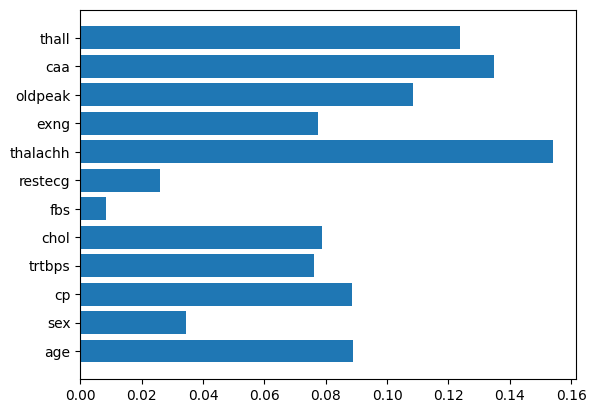

In [60]:
plt.barh(X.columns[:-1], rf.feature_importances_)

In [61]:
fi=rf.feature_importances_
np.sort(fi)

array([0.0082399 , 0.02608415, 0.03451602, 0.07615224, 0.07766222,
       0.07877868, 0.08864926, 0.08892799, 0.1083515 , 0.12393077,
       0.13473413, 0.15397314])

In [62]:
#drop the low feature importance attributes
final=X.drop(['sex', 'trtbps', 'chol', 'restecg', 'exng', 'fbs'],axis=1,inplace=False)

In [63]:
#save the final dataset
final.to_csv("/content/final.csv")

In [64]:
#exploring final dataset
final

,age,cp,thalachh,oldpeak,caa,thall,output
0,63.0,4,150,2.3,0,1,1
1,37.0,3,187,3.5,0,2,1
3,56.0,2,178,0.8,0,2,1
4,57.0,1,163,0.6,0,2,1
5,57.0,1,148,0.4,0,1,1
...,...,...,...,...,...,...,...
298,57.0,1,123,0.2,0,3,0
299,45.0,4,132,1.2,0,3,0
300,68.0,1,141,3.4,2,3,0
301,57.0,1,115,1.2,1,3,0


In [65]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 302
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       288 non-null    float64
 1   cp        288 non-null    int64  
 2   thalachh  288 non-null    int64  
 3   oldpeak   288 non-null    float64
 4   caa       288 non-null    int64  
 5   thall     288 non-null    int64  
 6   output    288 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 18.0 KB


In [66]:
final.describe()

,age,cp,thalachh,oldpeak,caa,thall,output
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,54.393660,1.968750,149.826389,1.010417,0.666667,2.319444,0.545139
std,9.042391,1.037148,22.652604,1.094536,0.925820,0.586168,0.498825
min,29.000000,1.000000,88.000000,0.000000,0.000000,1.000000,0.000000
25%,47.750000,1.000000,133.000000,0.000000,0.000000,2.000000,0.000000
50%,55.500000,2.000000,152.500000,0.750000,0.000000,2.000000,1.000000
75%,61.000000,3.000000,166.000000,1.600000,1.000000,3.000000,1.000000
max,77.000000,4.000000,202.000000,4.400000,3.000000,3.000000,1.000000


In [67]:
#finding the unique values of each categorical attribute in final dataset
print(len(final["cp"].unique()),
      len(final["thall"].unique()),
      len(final["caa"].unique()))

4 3 4


In [68]:
#this libary help to standerization of dataset each attribue
from sklearn.preprocessing import StandardScaler

In [69]:
standardizer = StandardScaler()

In [70]:
#split the final dataset
final_x_train,final_x_test,final_y_train,final_y_test=train_test_split(final.drop('output',axis=1),final['output'],test_size=0.30,random_state=100)

In [71]:
#standerize final_x_train and final_x_test
final_x_std_train = standardizer.fit_transform(final_x_train)
final_x_std_test=standardizer.fit_transform(final_x_test)

In [72]:
print(final_x_train.shape,final_x_test.shape,final_y_train.shape,final_y_test.shape)

(201, 6) (87, 6) (201,) (87,)


Now we train KNN classifier with different dataset and different parameters

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [74]:
#first we train knn with non-standerized dataset
knn_without_std = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1).fit(final_x_train, final_y_train)
pred_knn_without_std=knn_without_std.predict(final_x_test)
print(classification_report(final_y_test,pred_knn_without_std))

              precision    recall  f1-score   support

           0       0.71      0.59      0.64        46
           1       0.61      0.73      0.67        41

    accuracy                           0.66        87
   macro avg       0.66      0.66      0.65        87
weighted avg       0.66      0.66      0.65        87



In [75]:
#fitting KNN classifier with satnderized data 
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1).fit(final_x_std_train, final_y_train)

In [76]:
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [77]:
pred_knn=knn.predict(final_x_std_test)
print(classification_report(final_y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.61      0.73        46
           1       0.68      0.93      0.78        41

    accuracy                           0.76        87
   macro avg       0.79      0.77      0.76        87
weighted avg       0.80      0.76      0.75        87



as we see knn with standarized data has more accuracy then previously trained non standarized dataset
knn with out standarized data accuracy = 0.66
knn with standarized data accuracy =0.76

In [78]:
#Now we search best value for K, to increase accuracy, this searching conduct with GridsearchCV
pipe = Pipeline([('standardizer', standardizer), ('knn', knn)])
print ("pipe : ", pipe)
# Create space of candidate values
search_space = [{'knn__n_neighbors':[1,2,3,4,5,6,7,8,9,11,13]}]

pipe :  Pipeline(steps=[('standardizer', StandardScaler()),
                ('knn', KNeighborsClassifier(metric='euclidean', n_jobs=-1))])


In [79]:
clf = GridSearchCV(pipe, search_space, cv=5, verbose=1).fit(final_x_std_train, final_y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


in this grid search we find best number of n-neighbour is 8

In [80]:
#fit knn with k=8
knn2 = KNeighborsClassifier(n_neighbors=8, metric='euclidean', n_jobs=-1).fit(final_x_std_train, final_y_train)
pred_knn2=knn.predict(final_x_std_test)
print(classification_report(final_y_test,pred_knn2))

              precision    recall  f1-score   support

           0       0.90      0.61      0.73        46
           1       0.68      0.93      0.78        41

    accuracy                           0.76        87
   macro avg       0.79      0.77      0.76        87
weighted avg       0.80      0.76      0.75        87



AS we notice k value 8 increase our knn model aacuracy

In [81]:
#printing confusion matrix
confusion_df = pd.DataFrame(confusion_matrix(final_y_test, pred_knn2),
             columns = ["Predicted Class " + str(class_name) for class_name in [0, 1]],
             index = ["Class " + str(class_name) for class_name in [0, 1]]) 

In [82]:
confusion_df

,Predicted Class 0,Predicted Class 1
Class 0,28,18
Class 1,3,38


In [83]:
#print all parameters
knn2.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 8,
 'p': 2,
 'weights': 'uniform'}

In [84]:
y_score=knn2.predict_proba(final_x_std_test)[:,1]

Text(0.5, 0, 'False positive rate')

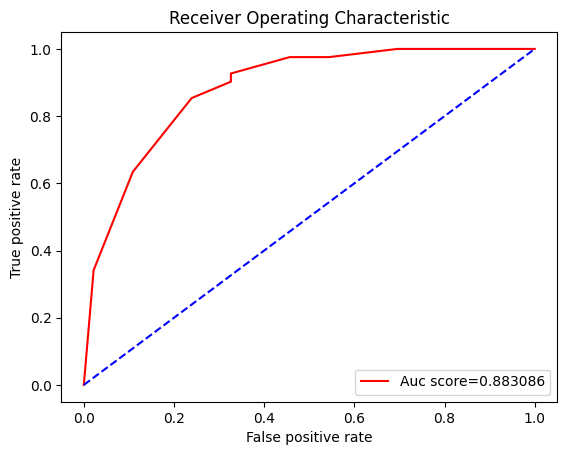

In [85]:
#print the roc curve
fpr,tpr,threshold=roc_curve(final_y_test,y_score)
roc_auc=auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'r',label="Auc score=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],'b',ls="--")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')


In [86]:
#our second classifier is Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [87]:
#fit the model
nb=GaussianNB()
nb.fit(final_x_train,final_y_train)

GaussianNB()

In [88]:
pred_nb=nb.predict(final_x_test)
print (classification_report(final_y_test,pred_nb))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        46
           1       0.79      0.83      0.81        41

    accuracy                           0.82        87
   macro avg       0.82      0.82      0.82        87
weighted avg       0.82      0.82      0.82        87



In [89]:
nb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [90]:
#printing confusion matrix
confusion_df = pd.DataFrame(confusion_matrix(y_test, pred_nb),
             columns = ["Predicted Class " + str(class_name) for class_name in [0, 1]],
             index = ["Class " + str(class_name) for class_name in [0, 1]])
confusion_df

,Predicted Class 0,Predicted Class 1
Class 0,37,9
Class 1,7,34


Text(0.5, 0, 'False positive rate')

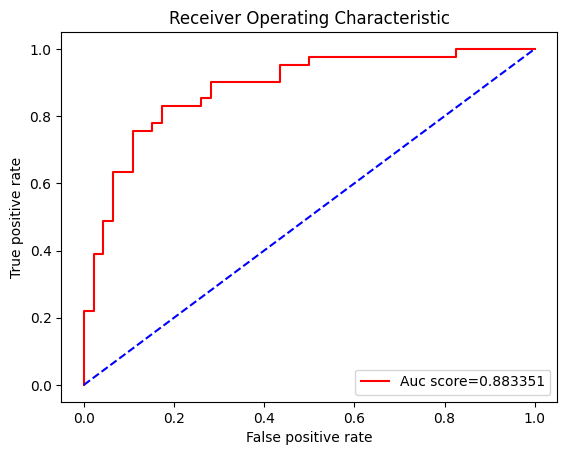

In [91]:
#printing roc curve
y_score=nb.predict_proba(final_x_test)[:,1]
fpr1,tpr1,threshold1=roc_curve(final_y_test,y_score)
roc_auc=auc(fpr1,tpr1)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr1,tpr1,'r',label="Auc score=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],'b',ls="--")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')


In [92]:
#our third classifier is decision tree
from sklearn.tree import DecisionTreeClassifier

In [93]:
dtree=DecisionTreeClassifier(min_samples_leaf=5,max_depth=5,random_state=100)


In [94]:
#fitting the model
dtree.fit(final_x_train,final_y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

In [95]:
#printing all parameters
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 100,
 'splitter': 'best'}

In [96]:
#fit the model
pred_dt=dtree.predict(final_x_test)

In [97]:
#print recall,precision,f1 score of model
print(classification_report(final_y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77        46
           1       0.74      0.71      0.72        41

    accuracy                           0.75        87
   macro avg       0.75      0.74      0.75        87
weighted avg       0.75      0.75      0.75        87



In [98]:
#printing the confusion matrix
print(pd.DataFrame(confusion_matrix(y_test, pred_dt),
             columns = ["Predicted Class " + str(class_name) for class_name in [0, 1]],
             index = ["Class " + str(class_name) for class_name in [0, 1]]))

         Predicted Class 0  Predicted Class 1
Class 0                 36                 10
Class 1                 12                 29


Text(0.5, 0, 'False positive rate')

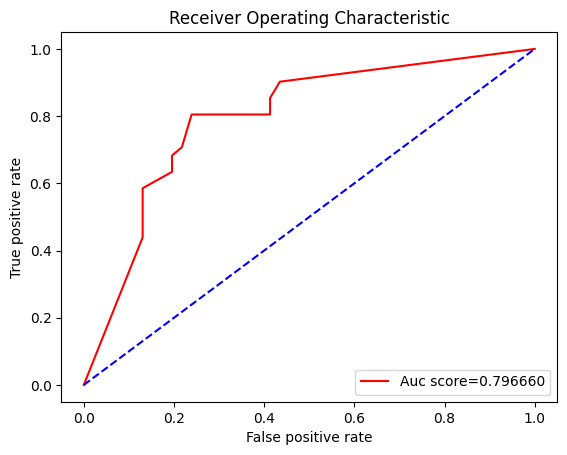

In [99]:
#printing roc curve
y_score=dtree.predict_proba(final_x_test)[:,1]
fpr2,tpr2,threshold2=roc_curve(final_y_test,y_score)
roc_auc=auc(fpr2,tpr2)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr2,tpr2,'r',label="Auc score=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],'b',ls="--")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')


In [100]:
#download tree as a txt file to draw the computerised graph of this tree
from sklearn import tree
with open("dtree.txt", "w") as t:
    t = tree.export_graphviz(dtree, out_file=t)

In [101]:
#our fouth model logistic regression
from sklearn.linear_model import LogisticRegression

In [102]:
#initialising the object of LogisticRegression class
logmodel=LogisticRegression()

In [103]:
#fitting the model
logmodel.fit(final_x_train,final_y_train)

LogisticRegression()

In [104]:
#testing and printing classification report and confusion matrix
pred_log=logmodel.predict(final_x_test)

In [105]:
print(classification_report(final_y_test,pred_log))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83        46
           1       0.78      0.88      0.83        41

    accuracy                           0.83        87
   macro avg       0.83      0.83      0.83        87
weighted avg       0.83      0.83      0.83        87



In [106]:
#we again fit the data with standarization,seeking more accuracy because regression base algorithms are sensiable to magnitude and variance
logmodel2=LogisticRegression()

In [107]:
logmodel2.fit(final_x_std_train,final_y_train)

LogisticRegression()

In [108]:
log_pred2=logmodel2.predict(final_x_std_test)

In [109]:
print(classification_report(final_y_test,log_pred2))

              precision    recall  f1-score   support

           0       0.91      0.67      0.78        46
           1       0.72      0.93      0.81        41

    accuracy                           0.79        87
   macro avg       0.81      0.80      0.79        87
weighted avg       0.82      0.79      0.79        87



Text(0.5, 0, 'False positive rate')

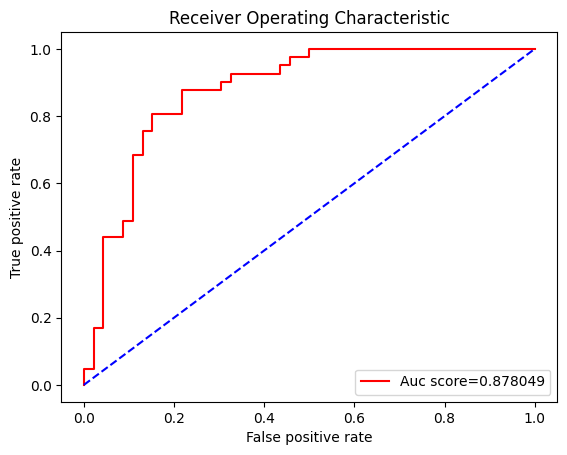

In [110]:
#roc curve for without standarised data
y_score=logmodel.predict_proba(final_x_test)[:,1]
fpr3,tpr3,threshold3=roc_curve(final_y_test,y_score)
roc_auc=auc(fpr3,tpr3)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr3,tpr3,'r',label="Auc score=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],'b',ls="--")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

Text(0.5, 0, 'False positive rate')

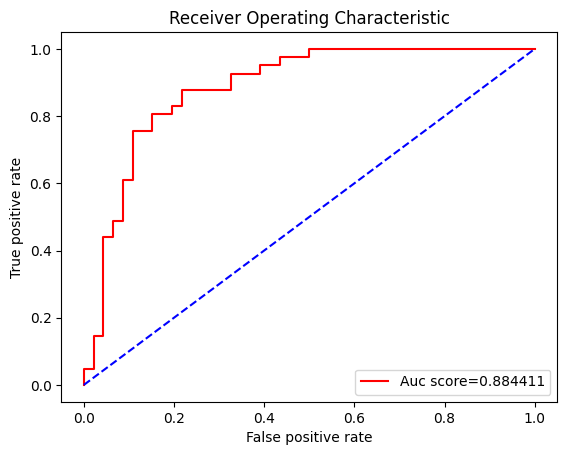

In [111]:
#roc curve for standarised data
y_score=logmodel2.predict_proba(final_x_std_test)[:,1]
fpr3,tpr3,threshold3=roc_curve(final_y_test,y_score)
roc_auc=auc(fpr3,tpr3)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr3,tpr3,'r',label="Auc score=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],'b',ls="--")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')


the logistic regression model without standerised data has more accuracy but if i consider the Auc score than model with standerisation has more auc score

In [112]:
#printing the coefficiency and intercept of logmodel without standarised dataset
print(final_x_test.columns)
print('coef' ,logmodel.coef_)
print("intercept %f"%logmodel.intercept_)

Index(['age', 'cp', 'thalachh', 'oldpeak', 'caa', 'thall'], dtype='object')
coef [[ 0.02048841  0.80047185  0.03326592 -0.89934254 -0.84460855 -1.12951193]]
intercept -3.478805


In [113]:
#printing the confusion matrix of logmodel with out standarized data
print(pd.DataFrame(confusion_matrix(final_y_test, pred_log),
             columns = ["Predicted Class " + str(class_name) for class_name in [0, 1]],
             index = ["Class " + str(class_name) for class_name in [0, 1]]))

         Predicted Class 0  Predicted Class 1
Class 0                 36                 10
Class 1                  5                 36


In [114]:
#now we print the r-square and rmse of our logistic regression model
from sklearn.metrics import mean_squared_error,r2_score

In [115]:
print('r_square',r2_score(final_y_test,pred_log))

r_square 0.30805938494167573


In [116]:
logmodel.score(final_x_test,final_y_test)

0.8275862068965517

In [117]:
d = {'col1': [1,1,1,1,0,1], 'col2': [1,1,1,1,0,1]}
df_test = pd.DataFrame(data=d)


In [118]:
print(y_test.to_list,pred_log)

<bound method IndexOpsMixin.tolist of 183    0
177    0
108    1
103    1
262    0
      ..
115    1
279    0
197    0
167    0
50     1
Name: output, Length: 87, dtype: int64> [0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1
 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1
 1 1 0 0 1 0 1 1 1 0 0 0 1]


In [119]:
#printing the parameters of logmodel
logmodel.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [120]:
mse=mean_squared_error(final_y_test,pred_log)
rmse=np.sqrt(mse)
print("mean_squared_error is %f and rmse is " %mse ,rmse)

mean_squared_error is 0.172414 and rmse is  0.41522739926869984


In [121]:
#now we train our 5th model which based on artificial neural network
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [122]:

import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Input,Dense,Dropout

In [123]:
final_x=final.iloc[:,:6]
final_x_std=standardizer.fit_transform(final_x)
x_train,x_test,y_train,y_test=train_test_split(final_x_std,final.iloc[:,6],test_size=0.30,random_state=100)

In [124]:

#three hidden layers used,1st has 16 , 2nd has 12 , 3rd has 8 nodes and also three dropout layers added to control overfitting data by input feature cutting
#here we have 201 samples for training & this take more time or may overfit for batch gradient desent so we use minibatch gradient desent
#also use 150 epoch or backpropagation

model2=Sequential()
model2.add(Dense(16,input_dim=6,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(12,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(8,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.fit(x_train,y_train,epochs=150,batch_size=100)


Epoch 1/150
3/3 [==============================] - 1s 6ms/step - loss: 0.6838 - accuracy: 0.5871
Epoch 2/150
3/3 [==============================] - 0s 3ms/step - loss: 0.6675 - accuracy: 0.6468
Epoch 3/150
3/3 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.6020
Epoch 4/150
3/3 [==============================] - 0s 3ms/step - loss: 0.6720 - accuracy: 0.6517
Epoch 5/150
3/3 [==============================] - 0s 3ms/step - loss: 0.6713 - accuracy: 0.6169
Epoch 6/150
3/3 [==============================] - 0s 3ms/step - loss: 0.6624 - accuracy: 0.6965
Epoch 7/150
3/3 [==============================] - 0s 4ms/step - loss: 0.6624 - accuracy: 0.6567
Epoch 8/150
3/3 [==============================] - 0s 4ms/step - loss: 0.6670 - accuracy: 0.6269
Epoch 9/150
3/3 [==============================] - 0s 3ms/step - loss: 0.6579 - accuracy: 0.7015
Epoch 10/150
3/3 [==============================] - 0s 3ms/step - loss: 0.6661 - accuracy: 0.6318
Epoch 11/150
3/3 [===========

In [125]:
pred_nn2=model2.predict(x_test)

3/3 [==============================] - 0s 3ms/step


In [126]:
#this loop covert the probablity of 1 ,as normal or High/ 0 or 1 based on the thareshold probablity>=0.5 covert into 1
for i in range(len(pred_nn2)):
  num=pred_nn2[i]
  int(num)
  if num>=0.5:
    pred_nn2[i]=1
  else:
    pred_nn2[i]=0  
#pred_nn

In [127]:
print(classification_report(final_y_test,pred_nn2))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83        46
           1       0.78      0.88      0.83        41

    accuracy                           0.83        87
   macro avg       0.83      0.83      0.83        87
weighted avg       0.83      0.83      0.83        87



A very noticeable thing we notice even with same parameter if model fit, in each fit we get different accuracy at each time compilation

In [128]:
#print the confusion matrix
print(pd.DataFrame(confusion_matrix(final_y_test, pred_nn2),
             columns = ["Predicted Class " + str(class_name) for class_name in [0, 1]],
             index = ["Class " + str(class_name) for class_name in [0, 1]]))

         Predicted Class 0  Predicted Class 1
Class 0                 36                 10
Class 1                  5                 36


In [129]:
model2.save("/content/heart_model.h5")

A Keras model consists of multiple components:

The architecture, or configuration, and structure of connection
A set of weights values (the "state of the model").

An optimizer (defined by compiling the model).

A set of losses and metrics

model fitting is time consuming so we have to save it as h5 file

In [130]:
#now we load the already saved model which saves our compiling time
savedModel=load_model('/content/heart_model.h5',compile=False)
savedModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                112       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9

In [131]:
pred_nn=savedModel.predict(x_test)
pred_nn

3/3 [==============================] - 0s 2ms/step


array([[0.39379057],
       [0.88951343],
       [0.8051722 ],
       [0.8130604 ],
       [0.11655842],
       [0.10578007],
       [0.7285714 ],
       [0.5624803 ],
       [0.09156261],
       [0.28714254],
       [0.45515254],
       [0.22928534],
       [0.16177484],
       [0.19629714],
       [0.98972166],
       [0.15689985],
       [0.06785434],
       [0.5910243 ],
       [0.19437745],
       [0.8327661 ],
       [0.5065927 ],
       [0.8850465 ],
       [0.7888095 ],
       [0.7585715 ],
       [0.5642991 ],
       [0.4908249 ],
       [0.92218834],
       [0.1648242 ],
       [0.2902417 ],
       [0.6549133 ],
       [0.95575297],
       [0.8445691 ],
       [0.3375815 ],
       [0.7595915 ],
       [0.15628824],
       [0.4097405 ],
       [0.91157633],
       [0.8674971 ],
       [0.13871907],
       [0.19507289],
       [0.88459957],
       [0.5231055 ],
       [0.7004922 ],
       [0.85757303],
       [0.9230248 ],
       [0.14755486],
       [0.23113649],
       [0.471

3/3 [==============================] - 0s 2ms/step


Text(0.5, 0, 'False positive rate')

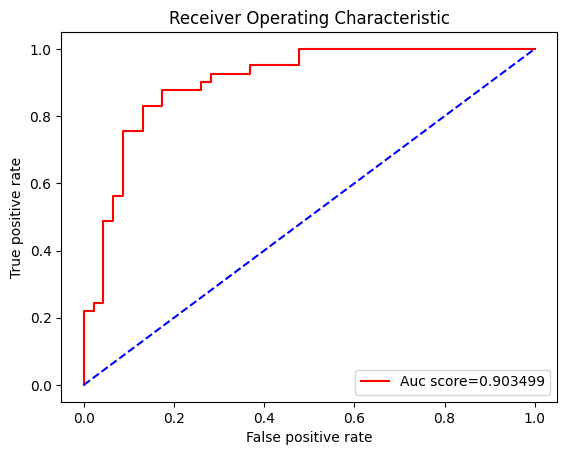

In [132]:
#printing roc curve using loadmodel
y_score=savedModel.predict(final_x_std_test)
fpr4,tpr4,threshold4=roc_curve(final_y_test,y_score)
roc_auc=auc(fpr4,tpr4)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr4,tpr4,'r',label="Auc score=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],'b',ls="--")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

In [133]:
#our 6th Model is Adaboost , a ensemble boosting base learning
from sklearn.ensemble import AdaBoostClassifier

In [134]:
#initialisation of object
adb=AdaBoostClassifier(n_estimators=80, learning_rate=1.0)

In [135]:
#fit the data
adb.fit(final_x_train,final_y_train)

AdaBoostClassifier(n_estimators=80)

In [136]:
pred_adb=adb.predict(final_x_test)

In [137]:
#printing all parameters
adb.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 80,
 'random_state': None}

In [138]:
#print classification report
print(classification_report(final_y_test,pred_adb)) #n_est=80

              precision    recall  f1-score   support

           0       0.77      0.74      0.76        46
           1       0.72      0.76      0.74        41

    accuracy                           0.75        87
   macro avg       0.75      0.75      0.75        87
weighted avg       0.75      0.75      0.75        87



In [139]:
#print Confusion Matrix
print(pd.DataFrame(confusion_matrix(final_y_test, pred_adb),
             columns = ["Predicted Class " + str(class_name) for class_name in [0, 1]],
             index = ["Class " + str(class_name) for class_name in [0, 1]]))

         Predicted Class 0  Predicted Class 1
Class 0                 34                 12
Class 1                 10                 31


Text(0.5, 0, 'False positive rate')

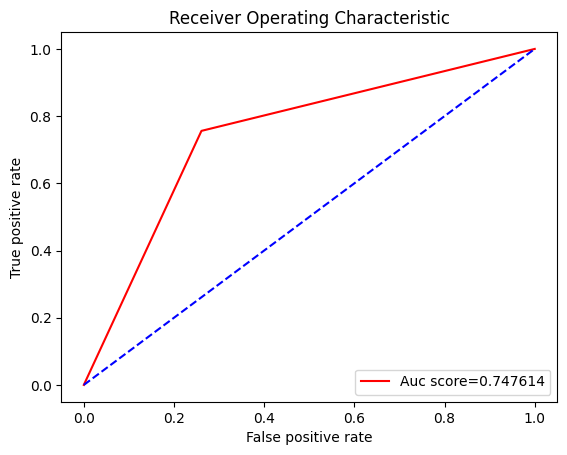

In [140]:
#print the roc curve
y_score=adb.predict(final_x_test)
fpr4,tpr4,threshold4=roc_curve(final_y_test,y_score)
roc_auc=auc(fpr4,tpr4)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr4,tpr4,'r',label="Auc score=%f"%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],'b',ls="--")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

Text(0, 0.5, '<<<<===Accuracy===>>>>')

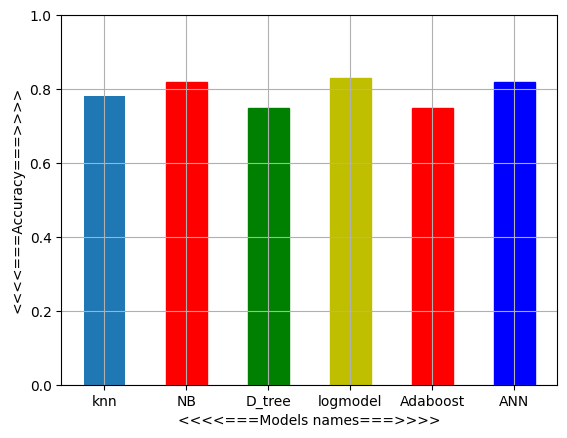

In [141]:
#now we plot the all 6 model accuracy
knn_auc=0.78
nb_auc=0.82
dtree_auc=0.75
logmodel_auc=0.83
Ann_auc=0.82
adaboost_auc=0.75
labels=['knn','NB','D_tree','logmodel','Adaboost','ANN']
values=[knn_auc,nb_auc,dtree_auc,logmodel_auc,adaboost_auc,Ann_auc]

auc_plot=plt.bar(labels,values,width=0.5)
plt.ylim(0,1)
plt.grid()
auc_plot[1].set_color('r')
auc_plot[2].set_color('g')
auc_plot[3].set_color('y')
auc_plot[4].set_color('r')
auc_plot[5].set_color('b')
plt.xlabel('<<<<===Models names===>>>>')
plt.ylabel('<<<<===Accuracy===>>>>')

In [159]:
test_data=pd.read_csv('/content/test.csv')
test_data['thall'].replace(['A','B','C','D'],[0,1,2,3], inplace=True)
test_data['cp'].replace(['typical angina', 'atypical angina','non-anginal pain','asymptomatic'],[1,2,3,4], inplace=True)

In [167]:
test_data

,age,cp,thalachh,oldpeak,caa,thall,output
0,63.0,4,150,2.3,0,1,1
1,37.0,3,187,3.5,0,2,1
2,56.0,2,178,0.8,0,2,1
3,57.0,1,163,0.6,0,2,1
4,57.0,1,148,0.4,0,1,1
...,...,...,...,...,...,...,...
95,42.0,4,178,0.8,2,2,1
96,59.0,4,145,4.2,0,3,1
97,63.0,2,179,0.0,2,2,1
98,42.0,3,194,0.8,0,3,1


In [175]:
x=test_data.iloc[:,:6]
y=test_data.iloc[:,6]

In [180]:
#lets predict our realtime test data with different models

#knn model
pred_knn=knn2.predict(x)
print("classification report knn \n",classification_report(y,pred_knn))

#decision tree
pred_dtree=dtree.predict(x)
print("classification report dtree \n",classification_report(y,pred_dtree))

#gaussian Naive bayes

pred_nb=nb.predict(x)
print("classification report nb \n",classification_report(y,pred_nb))


#logistic regression model

pred_logmodel = logmodel.predict(x)
print("classification report logmodel \n",classification_report(y,pred_logmodel))

#adaboost model

pred_adb=adb.predict(x)
print("classification report adaboost \n",classification_report(y,pred_adb))


#Artificial neural network model

pred_ann=model2.predict(x)
#this loop covert the probablity of 1 ,as normal or High/ 0 or 1 based on the thareshold probablity>=0.5 covert into 1
for i in range(len(pred_nn2)):
  num=pred_nn2[i]
  int(num)
  if num>=0.5:
    pred_nn2[i]=1
  else:
    pred_nn2[i]=0
#print("classification report neural network \n",classification_report(y,pred_nn))


classification report knn 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       100

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

classification report dtree 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.83      0.91       100

    accuracy                           0.83       100
   macro avg       0.50      0.41      0.45       100
weighted avg       1.00      0.83      0.91       100

classification report nb 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.88      0.94       100

    accuracy                           0.88       100
   macro avg       0.50      0.44      0.47       100
weighted avg       1.00      0.88      0.94